In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)


Using TensorFlow backend.


In [2]:
word_index = imdb.get_word_index()
reverse_word_index=dict(
         [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(
         [reverse_word_index.get(i - 3,'?') for i in train_data[0]])

import numpy as np 

def vectorize_sequences(sequences,dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequences in enumerate(sequences):
        results[i,sequences] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')


MemoryError: 

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
#model.add(layers.Dense(64,activation='relu'))
#model.add(layers.Dense(16,activation='relu'))
#model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [5]:

model.compile(optimizer='rmsprop',
              loss = 'mse',  #mse binary_crossentropy
              metrics = ['accuracy'])


In [6]:
from keras import optimizers
#
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
                   loss = 'mse',  #mse
                metrics = ['accuracy'])


In [7]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss      = losses.mse,       #mse
              metrics   = [metrics.binary_accuracy])


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

NameError: name 'y_train' is not defined

In [9]:
model.compile(optimizer = 'rmsprop',
                   loss = 'mse',   #mse
                metrics = ['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                   validation_data = (x_val,y_val))


NameError: name 'partial_y_train' is not defined

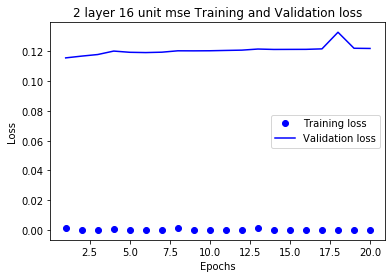

In [92]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values  = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('2 layer 16 unit mse Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


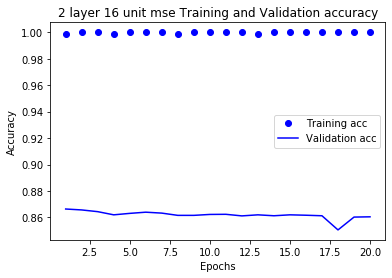

In [93]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('2 layer 16 unit mse Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

